In [23]:
import numpy as np
import os
import scipy as sp
from scipy.signal import decimate
import matplotlib.pyplot as plt

In [16]:
file = np.loadtxt(os.path.join(os.getcwd(), 'rsc', 'emul_pa_signal.txt'))
file.shape

(200001, 2)

In [44]:
dfile = decimate(file, int(file.shape[0]/1200), axis=0)
dfile[:1200,0] = np.arange(1200)
dfile[:1200,1] -= dfile[:1200,1].min()
dfile[:1200,1] /= dfile[:1200,1].max()/2
dfile[:1200,1] -= dfile[:1200,1].mean()
np.savetxt(os.path.join(os.getcwd(), 'rsc', 'emul_pa_signal_dec.txt'), dfile[:1200,:])

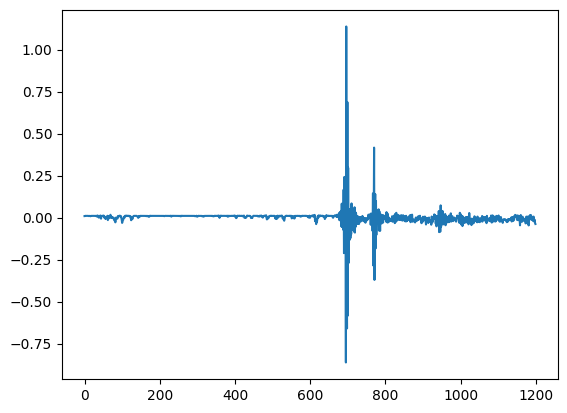

In [45]:
plt.plot(dfile[:1200,0], dfile[:1200,1])

In [47]:
dfile[:1200,1].max()

1.1378690940655378

In [57]:
path = os.path.join(
    os.getcwd(),
    'rsc',
    'emulations'
)
print(os.path.join(path, 'pa_fast_norm'))
pm_signal = np.loadtxt(os.path.join(path, 'pm_fast.txt'))
pa_signal = np.loadtxt(os.path.join(path, 'pa_fast_norm.txt'))

c:\Projects\PA RSCF Popov\PA-RSCF-22-72-00015-\rsc\emulations\pa_fast_norm


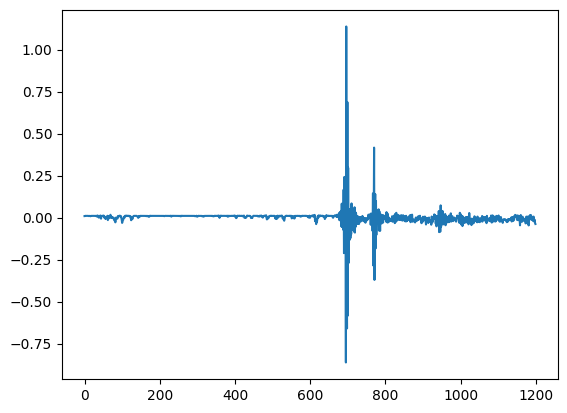

In [56]:
plt.plot(pa_signal[:,0], pa_signal[:,1])

In [59]:
pm_signal[:,1] /= pm_signal[:,1].max()

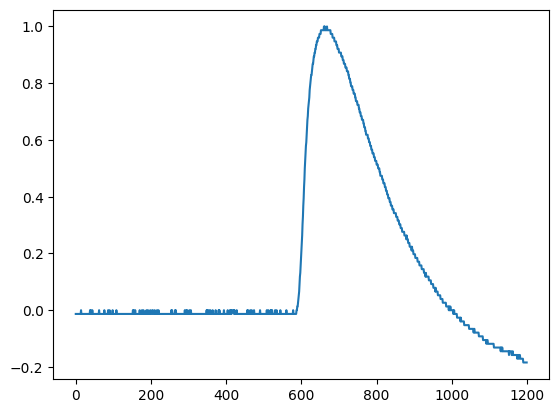

In [60]:
plt.plot(pm_signal[:,0], pm_signal[:,1])

In [61]:
np.savetxt(os.path.join(os.getcwd(), 'rsc', 'emul_pa_signal_dec.txt'), pm_signal)